#### **第一章**
##### 数据探究--鸢尾花数据
######  学习目标:学习sklearn常用命令，探究数据常用方法


In [12]:
from sklearn.datasets import load_iris 
import mglearn

In [13]:
iris_data=load_iris()

In [14]:
iris_data['data'].shape

(150, 4)

In [15]:
iris_data['data'][0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
iris_data['target'].shape

(150,)

In [17]:
from  sklearn.model_selection import train_test_split 
Xtrain,Xtest,ytrain,ytest = train_test_split(iris_data['data'],iris_data['target'],random_state =0,test_size = 0.3)

In [18]:
import pandas as pd
iris_dataframe = pd.DataFrame(Xtrain,columns = iris_data['feature_names'])

###### pd.plotting.scatter_matrix--解析
+ 参数
    + frame: DataFrame 对象
    + alpha: 图像透明度
    + figsize: 图像尺寸，元祖形式
    + ax: (Matplotlib axis object, 可选)，一般取None   
    + diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个，’hist’表示直方图(Histogram plot),’kde’表示核密度估计(Kernel Density Estimation)；该参数是scatter_matrix函数的关键参数
    + marker: (str, 可选)， Matplotlib可用的标记类型，如’.’，’,’，’o’等
    + density_kwds:(other plotting keyword arguments，可选)，与kde相关的字典参数
    + hist_kwds :(other plotting keyword arguments，可选)，与hist相关的字典参数
    + range_padding: (float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点
    + kwds :(other plotting keyword arguments，可选)，与scatter_matrix函数本身相关的字典参数

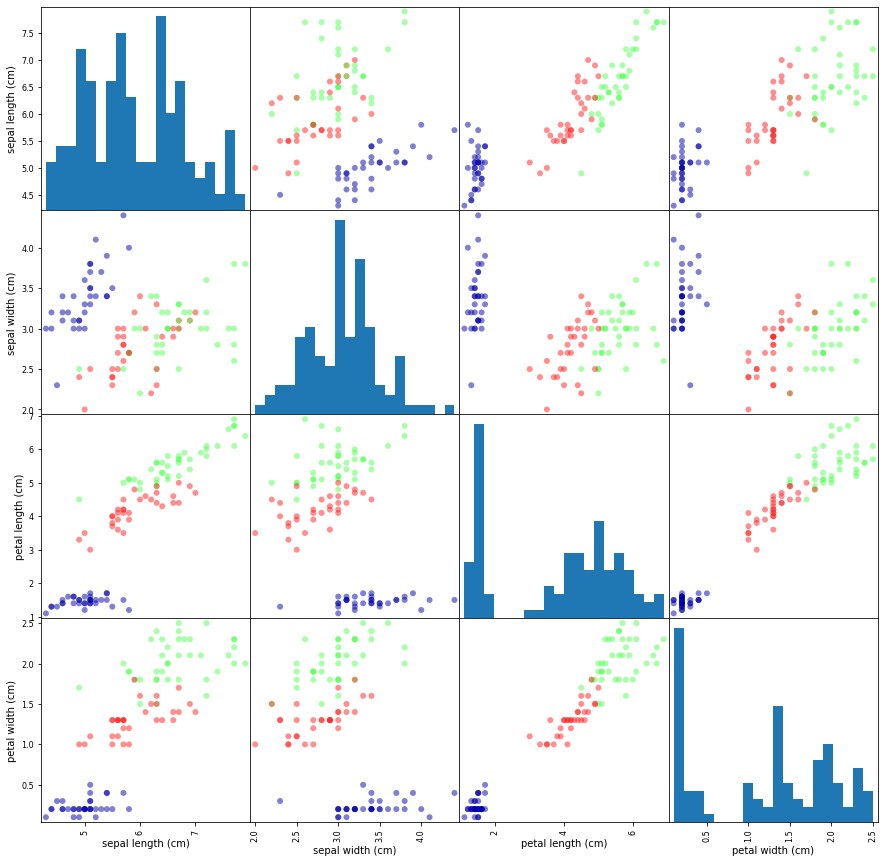

In [19]:
grr = pd.plotting.scatter_matrix(iris_dataframe,marker='o',figsize=(15,15),c = ytrain,hist_kwds={'bins':20},cmap=mglearn.cm3)


In [20]:
##### 算法1---K近邻算法

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN ## 导包
knn = KNN(n_neighbors = 1)## 实力化
knn.fit(Xtrain ,ytrain) ## 训练数据

KNeighborsClassifier(n_neighbors=1)

In [22]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape{}".format(X_new.shape))

X_new.shape(1, 4)


In [23]:
## 预测数据
prediction = knn.predict(X_new)
print("prediction:{}".format(prediction))
print("predicted target name:{}".format(iris_data['target_names'][prediction]))

prediction:[0]
predicted target name:['setosa']


##### 模型评估
+ 精度：accuracy--预测正确的样本所占的比例
   

In [25]:
y_pred  = knn.predict(Xtest)
print("The set predictions:\n{}".format(y_pred))

The set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [26]:
## 打分
print("Test set score by np.mean :{:.2f}".format(np.mean(y_pred == ytest))) ## 通过使用np.mean 计算accuracy
print("Test set score by score:{:.2f}".format(knn.score(Xtest,ytest)))  ##  通过使用knn.scores 计算accuracy

Test set score by np.mean :0.98
Test set score by score:0.98


##### 小结 
+ 基本定义
    + class： 类别
    + label： 标签
    + train set ： 训练集
    + test set ：  测试集
+ 常用方法
    + fit
    + transform
    + predict
    + score
+ 常用属性
    + score


### K近邻算法
mglearn.plots.plot_knn_classification(n_neighbors =3 )